In [1]:
from enviroments.SliderEnv import SliderEnv
import time
import os
import glob
import numpy as np 

from matplotlib import pyplot as plt

from stable_baselines3 import PPO


In [3]:

trial_name = "model_v15-forward3-5-2"
# trial_name = "model_v17-forward7"
model_save_path = "./trained_models/" + trial_name

env = SliderEnv(trial_name)

model =  PPO.load(model_save_path + "/model-1033", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [47]:
def trial_force(force, render = False):
    # Reset enviroment
    obs = env.reset()

    env.purtrub_max = [0,0,0]
    env.step_time = 1.0
    env.max_ep_time = 10 # seconds

    offset = int(np.random.random() * 100)

    env.data.qpos[0] = -1.0
    env.data.qpos[1] = 0.0

    for i in range(300):


        if(i == 50 + offset):
            env.apply_force(force)

        action, _state = model.predict(obs, deterministic=True)

        obs, reward, done, info = env.step(action)

        if render:
            env.render()

        # Fail
        if done:
            return False

    # Sucsess    
    return True

In [48]:
trial_force([0, -100, 0], True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151


False

## Single axis force

In [53]:
trials_per = 30
force_values = np.linspace(-250, 250, 50)
sucsess_nums = np.zeros(force_values.shape)

for i in range(force_values.shape[0]):
    force_value = force_values[i]

    sucsess_num_trial = 0
    for num in range(trials_per):
        sucsess = trial_force([0, force_value, 0], False)

        sucsess_num_trial += int(sucsess)

    sucsess_nums[i] = sucsess_num_trial

    print(force_value)
    print(sucsess_num_trial)

-250.0
0
-239.79591836734693
0
-229.59183673469389
0
-219.3877551020408
0
-209.18367346938777
0
-198.9795918367347
0
-188.77551020408163
0
-178.57142857142856
0
-168.3673469387755
0
-158.16326530612247
3
-147.9591836734694
6
-137.75510204081633
10
-127.55102040816327
12
-117.34693877551021
11
-107.14285714285714
20
-96.9387755102041
19
-86.73469387755102
23
-76.53061224489795
26
-66.32653061224491
28
-56.12244897959184
22
-45.918367346938794
26
-35.71428571428572
28
-25.51020408163265
30
-15.306122448979607
30
-5.102040816326536
30
5.102040816326536
30
15.306122448979579
29
25.51020408163265
30
35.71428571428572
30
45.918367346938794
30
56.12244897959181
30
66.32653061224488
30
76.53061224489795
30
86.73469387755102
28
96.9387755102041
20
107.14285714285711
19
117.34693877551018
17
127.55102040816325
9
137.75510204081633
5
147.9591836734694
2
158.1632653061224
0
168.36734693877548
0
178.57142857142856
0
188.77551020408163
0
198.9795918367347
0
209.18367346938777
0
219.38775510204079
0


In [30]:
sucsess_numsX = sucsess_nums.copy()

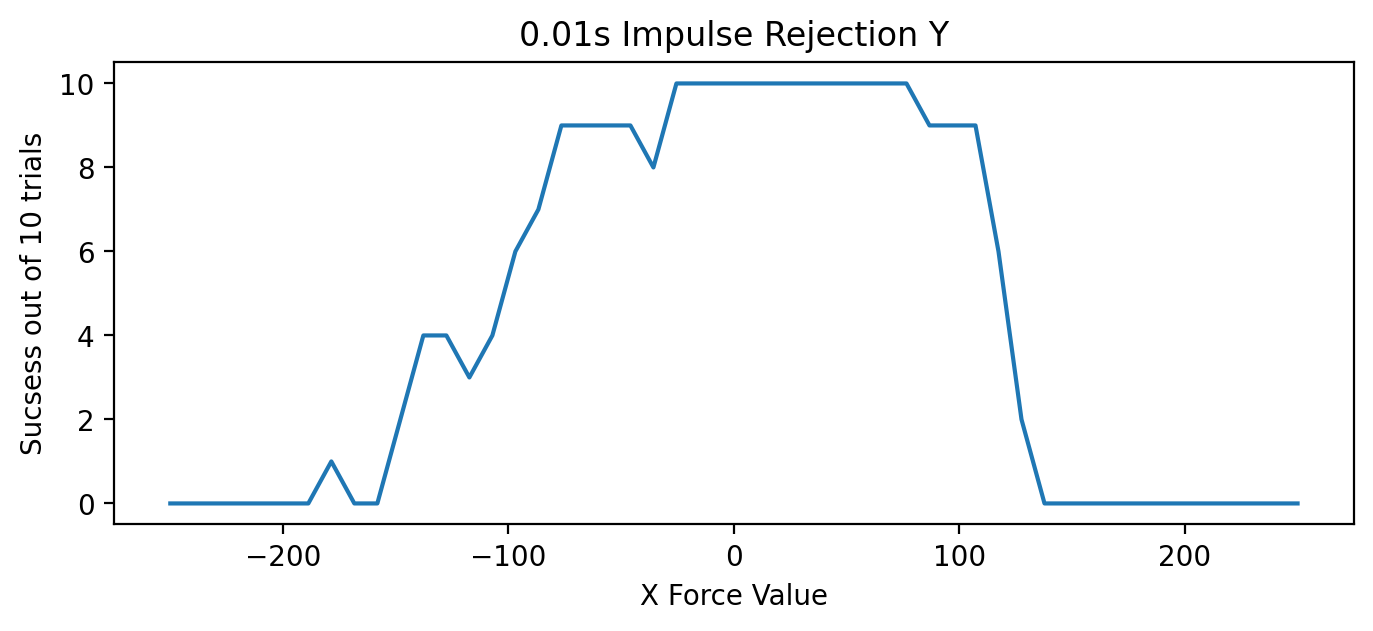

In [52]:
plt.figure(dpi = 200, figsize=[8, 3])

plt.title("0.01s Impulse Rejection Y")
plt.xlabel("X Force Value")
plt.ylabel("Sucsess out of 10 trials")
plt.plot(force_values, sucsess_nums)
#plt.plot(force_values, sucsess_numsA)
plt.show()

# Dual axis force

In [14]:
trials_per = 5
force_values_x = np.linspace(-250, 250, 25)
force_values_y = np.linspace(-250, 250, 25)
sucsess_nums = np.zeros((force_values_x.shape[0], force_values_y.shape[0]))

for i in range(force_values_x.shape[0]):
    for j in range(force_values_y.shape[0]):

        force = [force_values_x[i], force_values_y[j], 0]

        sucsess_num_trial = 0
        for num in range(trials_per):
            sucsess = trial_force(force, False)

            sucsess_num_trial += int(sucsess)

        sucsess_nums[i, j] = sucsess_num_trial

        #print(force)
        #print(sucsess_num_trial)

    print(i / 30.0)

0.0
0.03333333333333333
0.06666666666666667
0.1
0.13333333333333333
0.16666666666666666
0.2
0.23333333333333334
0.26666666666666666
0.3
0.3333333333333333
0.36666666666666664
0.4
0.43333333333333335
0.4666666666666667
0.5
0.5333333333333333
0.5666666666666667
0.6
0.6333333333333333
0.6666666666666666
0.7
0.7333333333333333
0.7666666666666667
0.8


In [41]:
plt.figure(dpi=200)
plt.imshow(sucsess_nums, extent=[-250, 250, -250, 250])
plt.title("0.01s Force")
plt.xlabel("X Force (N)")
plt.ylabel("Y Force (N)")

NameError: name 'sucsess_nums' is not defined

<Figure size 1280x960 with 0 Axes>

Text(0.5, 1.0, 'Slope Angle Trials')

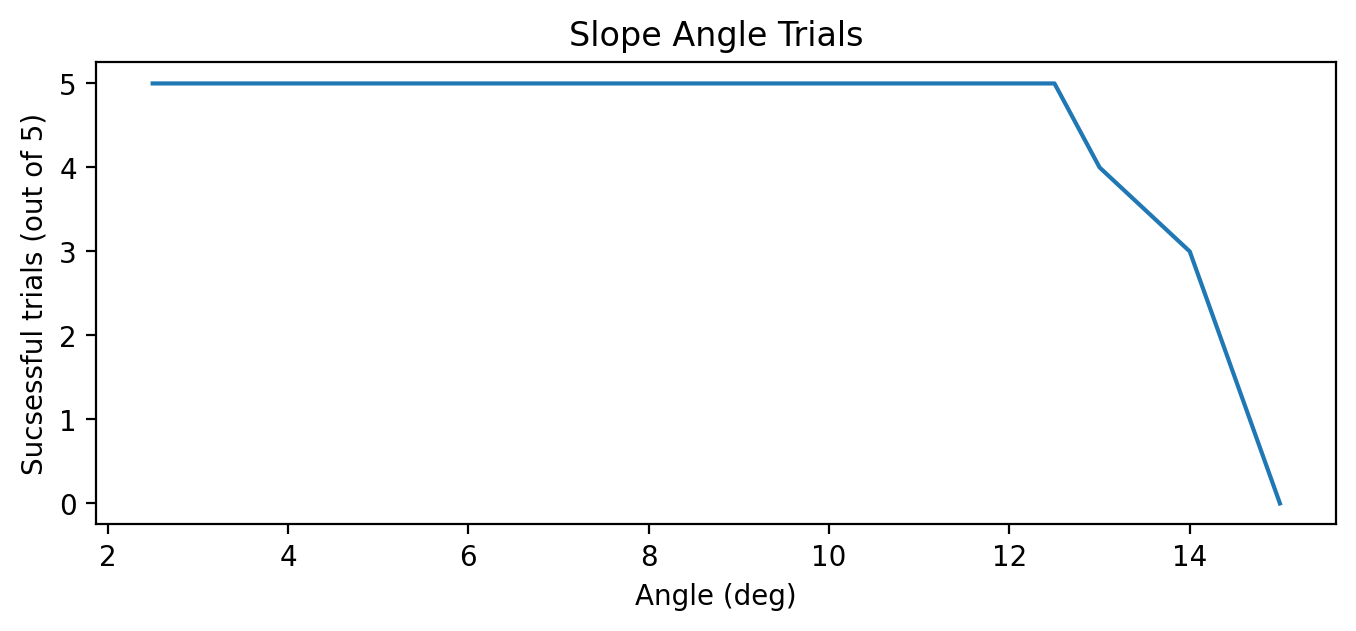

In [13]:
sucsess = [5, 5, 5, 5, 5, 4, 3, 0]
angle =   [2.5, 5, 7.5, 10, 12.5, 13, 14, 15]

plt.figure(dpi = 200, figsize=[8, 3])

plt.plot(angle, sucsess)
plt.xlabel("Angle (deg)")
plt.ylabel("Sucsessful trials (out of 5)")
plt.title("Slope Angle Trials")

Text(0.5, 1.0, 'Stair Climbing Trials')

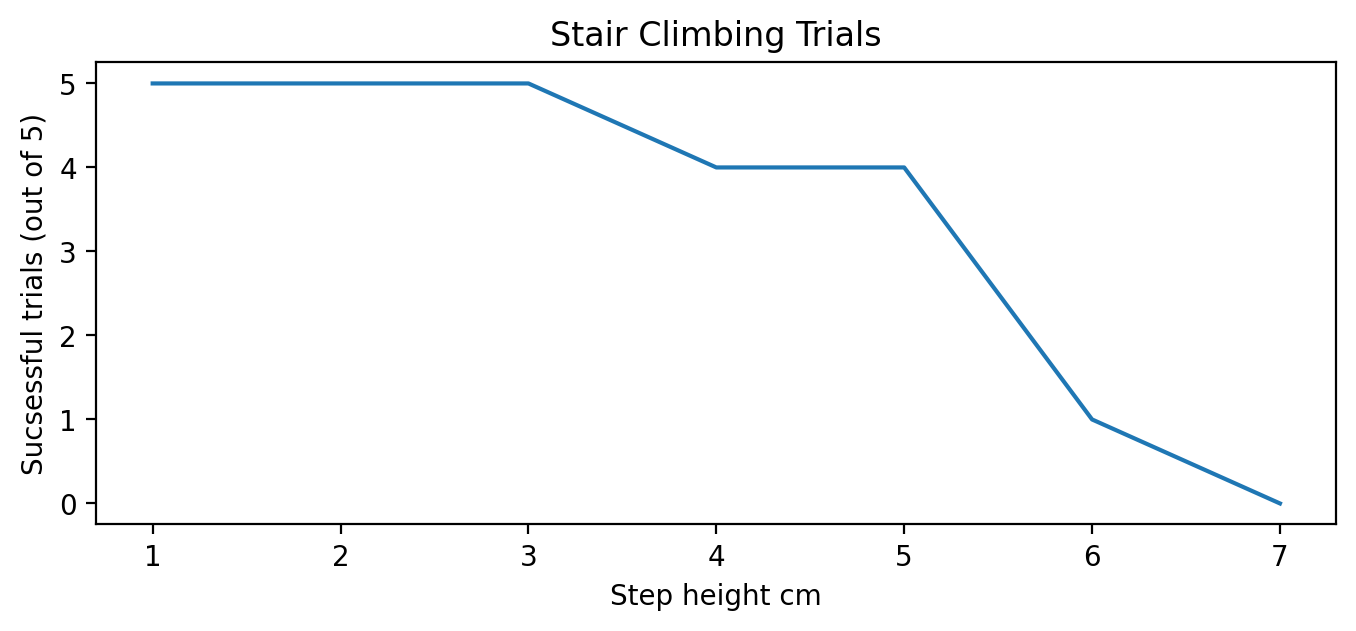

In [3]:
sucsess = [5, 5, 5, 4, 4, 1, 0]
angle =   [1,2,3,4,5,6,7]

plt.figure(dpi = 200, figsize=[8, 3])

plt.plot(angle, sucsess)
plt.xlabel("Step height cm")
plt.ylabel("Sucsessful trials (out of 5)")
plt.title("Stair Climbing Trials")